In [12]:
pip install contextily


Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [14]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import contextily as ctx

# Read your Excel file
df = pd.read_excel("Sensor Location Data.xlsx")

# Split the "Lat/Long" column into two new columns
df[['latitude', 'longitude']] = df['Lat/Long'].str.split(',', expand=True)

# Convert them from string to float
df['latitude'] = df['latitude'].astype(float)
df['longitude'] = df['longitude'].astype(float)

# Check result
print(df[['Locatienaam', 'latitude', 'longitude']].head())

                       Locatienaam   latitude  longitude
0            Kalverstraat t.h.v. 1  52.372634   4.892071
1                     Korte Niezel  52.374616   4.899830
2                  Oudekennissteeg  52.373860   4.898690
3                       Stoofsteeg  52.372439   4.897689
4  Oudezijds Voorburgwal t.h.v. 91  52.373538   4.898166


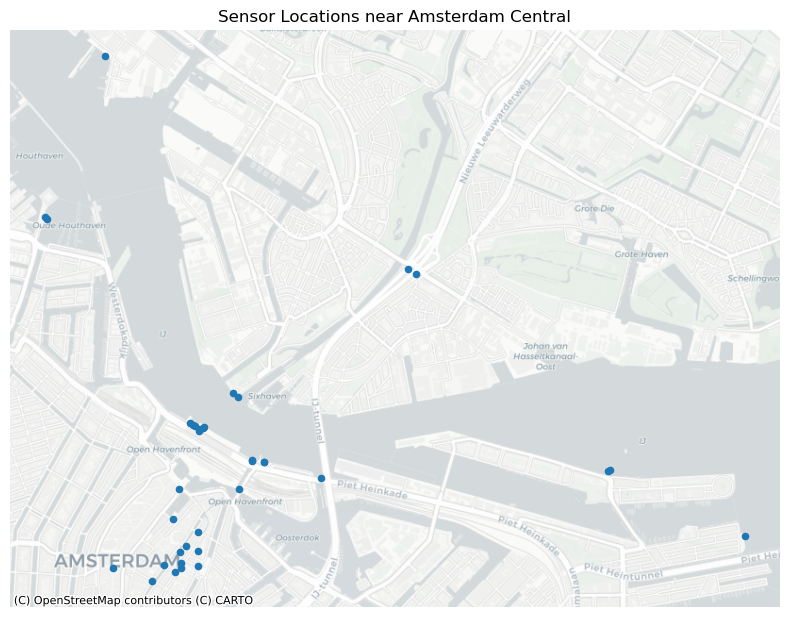

In [16]:

gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude), crs="EPSG:4326")
gdf_3857 = gdf.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(8, 8))
gdf_3857.plot(ax=ax, markersize=20)

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

ax.set_title("Sensor Locations near Amsterdam Central")
ax.set_axis_off()
plt.tight_layout()
plt.show()